In [16]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [17]:
param_list_short = ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance']
param_labels = [r"$\mathcal{M}_c$", r"$q$", r"$a_1$", r"$a_2$", r"$\theta_{jn}$", r"$d_L$"]


In [18]:
with open("credible_levels.json", "r") as f:
    data = json.load(f)

In [21]:
data.keys()

dict_keys(['chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance'])

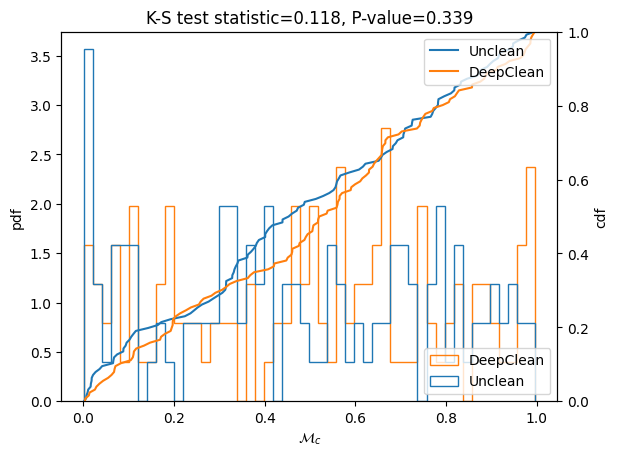

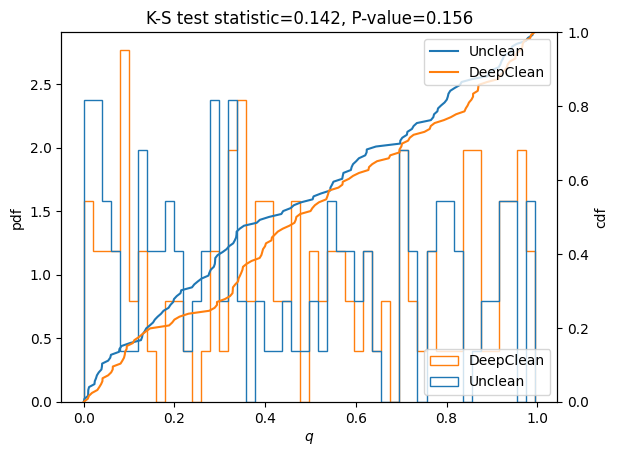

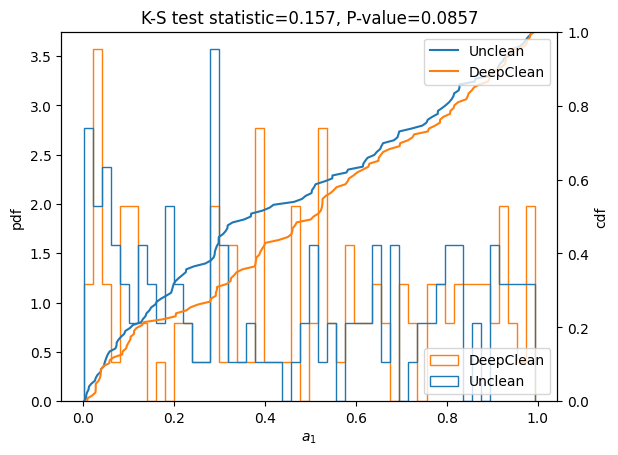

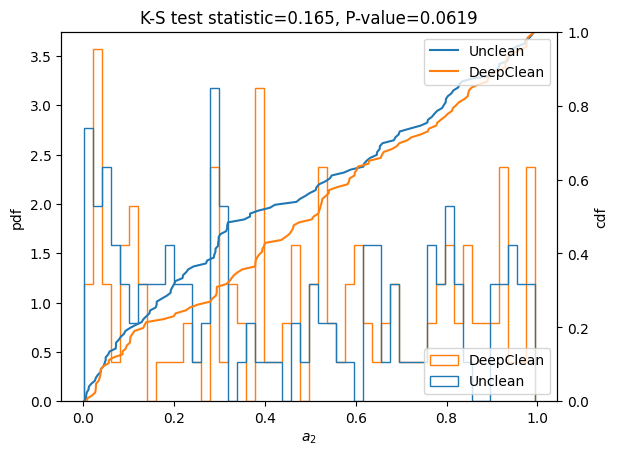

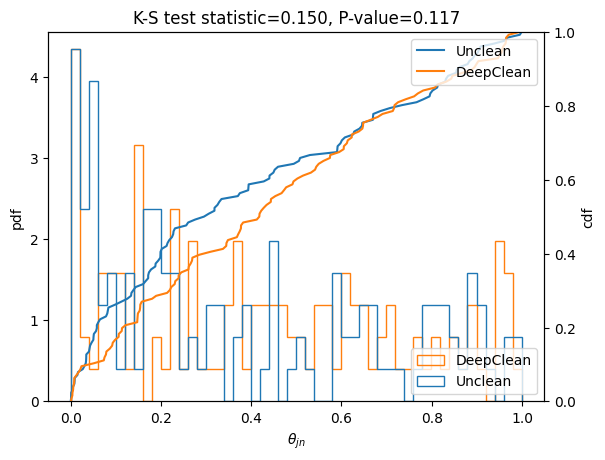

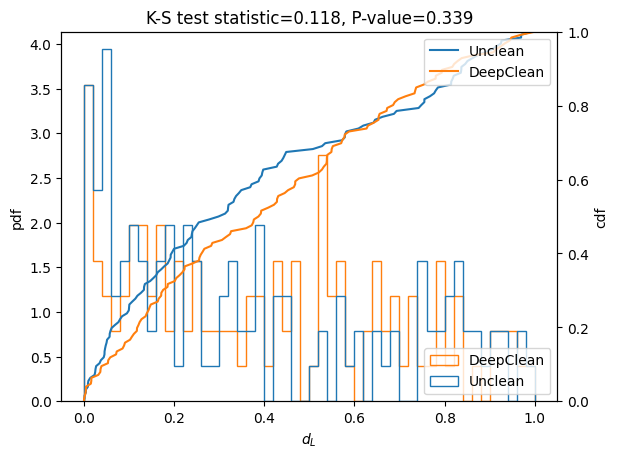

In [ ]:
for k, col in enumerate(param_list_short):
    fig, ax = plt.subplots()

    # Histogrammes PDF
    ax.hist(
        [data[col]["Unclean"], data[col]["DeepClean"]],
        label=['Unclean', 'DeepClean'],
        histtype='step',
        density=1,
        bins=50)
    ax.set_ylim(0, None)
    ax.set_ylabel('pdf')
    
    # CDF
    ax2 = ax.twinx()
    ax2.set_ylabel('cdf')
    ax2.set_ylim(0, 1)
    ax2.plot(np.sort(data[col]["Unclean"]), np.linspace(0, 1, len(data[col]["Unclean"])), label='Unclean')
    ax2.plot(np.sort(data[col]["DeepClean"]), np.linspace(0, 1, len(data[col]["DeepClean"])), label='DeepClean')
    
    # Legend
    ax.legend(loc='lower right')
    ax2.legend(loc='upper right')

    # KS test
    stat, pvalue = ks_2samp(data[col]["Unclean"], data[col]["DeepClean"])
    ax.set_xlabel(param_labels[k])
    ax.set_title(f'K-S test statistic={stat:0.3f}, P-value={pvalue:0.3g}')
    fig.savefig(f'ks_{col}.png', dpi=300)